# <center> **<font face='sans-serif' size=36> <span style="color:#008080"> Air Quality Index Prediction Project </span> </font></center>**<img src="aqi.png" width="1000" height="400">

#### <font face='sans-serif' size=5>**Name:** Mariyambi nazar</font>
#### <font face='sans-serif' size=5>**Organization:** Entri Elavate</font>
#### <font face='sans-serif' size=5>**Date:** 28/05/2024</font>

#  **<font face='sans-serif' size=6>Overview of Problem Statement</font>**
##  <i><font  face='sans-serif' size=4> <span style="color:#008080" >In the midst of contemporary urbanization and growing environmental concerns, the accurate prediction of Air Quality Index (AQI) has emerged as a pivotal challenge. This Machine Learning (ML) project is dedicated to forecasting AQI levels through advanced predictive analytics. With increasing awareness of the health ramifications of air pollution, the project employs regression analysis, Random Forest (RF), MLPRegressor and other ML techniques. By analyzing diverse datasets comprising air pollutant concentrations and meteorological parameters, the project aims to equip stakeholders with actionable insights to facilitate informed decision-making. This endeavor represents a significant stride towards achieving cleaner air and fostering sustainable urban environments.</i></font></span>
 


#  **<font face='sans-serif'>Objective</font>**
## <font face='sans-serif' size=4>  <span style="color:#008080"><i>This project aims to employ Machine Learning methods to forecast Air Quality Index (AQI) levels effectively, facilitating informed decision-making for air quality management and public health initiatives.</i> </font></span>
<font face='sans-serif' size=4>  <span style="color:#008080">
##### 1. Data Collection
##### 2. Data Cleaning and Preprocessing
##### 3. Exploratory Data Analysis (EDA)
##### 4. Feature Engineering
##### 5. Feature Selection
##### 6. Feature Scaling
##### 7. Split Data into Training and Testing Sets
##### 8. Build the ML Model
##### 9. Model Evaluation
##### 10. Hyperparameter Tuning
##### 11. Save the model
##### 12. Test with unseen
</font></span>

<center><img src=aqi_index.png width="1000" height="400"></center>

#  **<font face='sans-serif'>Data Description</font>**
###  <i><font face='sans-serif' size=4><span style="color:#008080">Features in Dataset:The dataset is structured to include a variety of features that provide a holistic view of air quality. 
</span></font></i>


#### 1.Country:
The country where the city is located. This helps in identifying the broader geographical and regulatory                            context for the air quality data.
#### 2.City:
The specific city for which the air quality data is being reported. Different cities can have vastly different air quality profiles due to factors like industrial activity, traffic, and geography.
#### 3.AQI Value:
The overall Air Quality Index (AQI) value, which is a composite number used to communicate how polluted the air currently is or how polluted it is forecast to become. The AQI is calculated based on the levels of various pollutants including ground-level ozone, particulate matter (PM2.5 ), carbon monoxide (CO)and nitrogen dioxide (NO2).
#### 4.AQI Categories:
##### Good
##### Moderate
##### Unhealthy for Sensitive Groups
##### Unhealthy
##### Very Unhealthy
#### 5.CO AQI Value:
The AQI value specifically for carbon monoxide (CO). Carbon monoxide is a colorless, odorless gas that can be harmful when inhaled in large amounts. It is typically produced by motor vehicles, industrial processes, and residential heating systems.
#### 6.CO AQI Category:
The category that corresponds to the CO AQI value. Categories often range from "Good" to "Hazardous" and provide a quick understanding of the potential health impacts of the CO levels. 
#### 7.Ozone AQI Value:
The AQI value specifically for ozone (O3). Ground-level ozone is a key component of smog and is harmful to respiratory health.
#### 8.Ozone AQI Category:
The category corresponding to the ozone AQI value, indicating the health risks associated with the current ozone levels.
#### 10.NO2 AQI Category:
The category for nitrogen dioxide (NO2) levels. NO2 is a significant air pollutant that contributes to the formation of smog and acid rain and can have adverse health effects, particularly on the respiratory system.
#### 11.PM2.5 AQI Value:
The AQI value specifically for fine particulate matter (PM2.5). PM2.5 refers to particulate matter that is less than 2.5 micrometers in diameter. These particles can penetrate the respiratory system and have been linked to various health problems, including heart and lung diseases.
#### 12.PM2.5 AQI Category:
The category corresponding to the PM2.5 AQI value, indicating the potential health effects of the current PM2.5 levels.
#### 13.Latitude (Lat): 
The latitude coordinate of the city. Latitude is a geographical coordinate that specifies the north-south position of a point on the Earth's surface.

#### 14.Longitude (Lng): 
The longitude coordinate of the city. Longitude is a geographical coordinate that specifies the east-west position of a point on the Earth's surface.

## Dataset:
###  <i><font face='sans-serif' size=4><span style="color:#008080">This dataset has **(16,695 rows and 14 columns)**
</span></font></i>
Dataset taken from kaggle-
<a href="https://example.com" style="color: blue;">https://www.kaggle.com/datasets/adityaramachandran27/world-air-quality-index-by-city-and-coordinates?resource=download </a>


#  **<font face='sans-serif'>Data Collection</font>**

### **<font face='sans-serif'>Import Libraries**</font>

In [83]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import  RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score,root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif,f_regression
from sklearn.pipeline import Pipeline


In [84]:
# Load the dataset
df=pd.read_csv("C:\\Users\\MyLap\\Downloads\\archive (3)\\AQI and Lat Long of Countries.csv")
# Display the first few rows of the dataset
df.head(5)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


### <font face='sans-serif' size=4>The dataset comprises 16,695 records spanning 14 distinct variables, offering a comprehensive framework for analysis.</font>

#  **<font face='sans-serif'>Data Cleaning and Preprocessing</font>**

###  <i><font face='sans-serif' size=4><span style="color:#008080">Before diving into the analysis, it's important to clean and preprocess the data to ensure accurate and meaningful results. We will handle missing values, remove irrelevant columns, and perform any necessary transformations

In [85]:
# Display DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16695 non-null  object 
 2   AQI Value           16695 non-null  int64  
 3   AQI Category        16695 non-null  object 
 4   CO AQI Value        16695 non-null  int64  
 5   CO AQI Category     16695 non-null  object 
 6   Ozone AQI Value     16695 non-null  int64  
 7   Ozone AQI Category  16695 non-null  object 
 8   NO2 AQI Value       16695 non-null  int64  
 9   NO2 AQI Category    16695 non-null  object 
 10  PM2.5 AQI Value     16695 non-null  int64  
 11  PM2.5 AQI Category  16695 non-null  object 
 12  lat                 16695 non-null  float64
 13  lng                 16695 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.8+ MB


In [86]:
# Display column names
df.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category', 'lat', 'lng'],
      dtype='object')

In [87]:
# Display descriptive statistics for all columns
df.describe(include ='all')

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
count,16393,16695,16695.000000,16695,16695.000000,16695,16695.000000,16695,16695.000000,16695,16695.000000,16695,16695.000000,16695.000000
unique,174,14229,NaN,6,NaN,3,NaN,5,NaN,2,NaN,6,NaN,NaN
top,United States of America,Santa Cruz,NaN,Good,NaN,Good,NaN,Good,NaN,Good,NaN,Good,NaN,NaN
freq,3954,17,NaN,7708,NaN,16691,NaN,15529,NaN,16684,NaN,7936,NaN,NaN
mean,NaN,NaN,62.998682,NaN,1.342138,NaN,31.767355,NaN,3.819647,NaN,59.821324,NaN,30.267148,-3.944485
std,NaN,NaN,43.091971,NaN,2.371379,NaN,22.839343,NaN,5.880677,NaN,43.208298,NaN,22.947398,73.037148
min,NaN,NaN,7.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,-54.801900,-171.750000
25%,NaN,NaN,38.500000,NaN,1.000000,NaN,20.000000,NaN,0.000000,NaN,34.000000,NaN,16.515450,-75.180000
50%,NaN,NaN,52.000000,NaN,1.000000,NaN,29.000000,NaN,2.000000,NaN,52.000000,NaN,38.815800,5.643100
75%,NaN,NaN,69.000000,NaN,1.000000,NaN,38.000000,NaN,5.000000,NaN,69.000000,NaN,46.683300,36.275000


###  **<font face='sans-serif' size=3>Handling missing values** </font>

In [88]:
# Display the number of missing values in each column
df.isnull().sum()

Country               302
City                    0
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
lat                     0
lng                     0
dtype: int64

In [89]:
# Display the number of missing values in each column before dropping
df.dropna(inplace=True)
df.isna().sum()

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
lat                   0
lng                   0
dtype: int64

###  <font face='sans-serif' size=3>Country column has a total of 302 null values.</font>

###  **<font face='sans-serif' size=3>Handling Duplicates** </font>

In [90]:
#Displaying the duplicate values
df.duplicated().sum()

0

In [91]:
#Displaying the duplicate values in the column 'City'
df.duplicated(subset='City').sum()

2437

###  <font face='sans-serif' size=3>The 'City' column has **2,437** duplicate values, </font>

In [92]:
#Dropping the duplicates found in the 'City' column
df = df.drop_duplicates(subset='City')

In [93]:
#Resetting the index after dropping the duplicates
df.reset_index(drop=True, inplace=True)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13956 entries, 0 to 13955
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             13956 non-null  object 
 1   City                13956 non-null  object 
 2   AQI Value           13956 non-null  int64  
 3   AQI Category        13956 non-null  object 
 4   CO AQI Value        13956 non-null  int64  
 5   CO AQI Category     13956 non-null  object 
 6   Ozone AQI Value     13956 non-null  int64  
 7   Ozone AQI Category  13956 non-null  object 
 8   NO2 AQI Value       13956 non-null  int64  
 9   NO2 AQI Category    13956 non-null  object 
 10  PM2.5 AQI Value     13956 non-null  int64  
 11  PM2.5 AQI Category  13956 non-null  object 
 12  lat                 13956 non-null  float64
 13  lng                 13956 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.5+ MB


#  **<font face='sans-serif'> Exploratory Data Analysis</font>**
###  <i><font face='sans-serif' size=4><span style="color:#008080">Exploratory Data Analysis (EDA) is essential for understanding datasets. It helps uncover patterns, identify anomalies, and extract insights using summary statistics and visualizations. This project will employ Python tools like pandas, matplotlib, and seaborn to conduct EDA, facilitating a deeper understanding of the data and setting the stage for advanced analysis

In [95]:
# Display the shape of the DataFrame
df.shape

(13956, 14)

### <font face='sans-serif' size=4> After the Data cleaning, there are **13956** rows </font>

In [96]:
df.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category', 'lat', 'lng'],
      dtype='object')

In [97]:
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
count,13956.000000,13956.000000,13956.000000,13956.000000,13956.000000,13956.000000,13956.000000
mean,63.216538,1.325093,32.558613,3.518917,59.896389,30.935687,0.842514
std,43.535318,1.985798,23.435088,5.666271,43.629999,23.015090,70.334285
min,7.000000,0.000000,0.000000,0.000000,0.000000,-54.801900,-159.771000
25%,38.000000,1.000000,21.000000,0.000000,34.000000,17.994225,-71.687850
50%,52.000000,1.000000,30.000000,2.000000,52.000000,39.316700,8.131650
75%,69.000000,1.000000,38.000000,4.000000,69.000000,48.166700,37.799225
max,500.000000,133.000000,222.000000,91.000000,500.000000,70.767000,178.017800


####  **<font face='sans-serif'>Interpretation:</font>**
###  <font face='sans-serif' size=4>1.Global average AQI value is approximately **63.21.** This falls within the category of Moderate air quality on the AQI scale</font>
###  <font face='sans-serif' size=4>2.AQI values span a range from **7 (minimum)** to **500 (maximum)**. The 25th percentile falls at **38**, indicating that 25% of the values are lower than **38**. The median value, representing the 50th percentile, is **52**. Finally, the 75th percentile lies at **69**, suggesting that 75% of the values are below **69**</font>

####  **<font face='sans-serif'>Top Ten Countries( Polluted and Clean)**</font>

In [98]:
# Group by country and calculate the average AQI, rounded to two decimal places
avg_aqi_country = df.groupby("Country")["AQI Value"].mean().round(2).reset_index()
# Get the top ten polluted countries
topten_polluted_countries = avg_aqi_country.sort_values("AQI Value", ascending = False).head(10)
print("Top ten polluted country:",topten_polluted_countries)
# Get the top ten clean countries
topten_clean_countries = avg_aqi_country.sort_values("AQI Value", ascending = True).head(10)
print("Top ten clean country:",topten_clean_countries)

Top ten polluted country:                   Country  AQI Value
126     Republic of Korea     421.00
11                Bahrain     188.00
116              Pakistan     184.34
134          Saudi Arabia     166.25
98             Mauritania     164.00
125                 Qatar     164.00
163  United Arab Emirates     163.67
7                   Aruba     163.00
82                 Kuwait     161.00
115                  Oman     155.00
Top ten clean country:                               Country  AQI Value
117                             Palau      16.00
142                   Solomon Islands      18.00
95                           Maldives      19.00
68                            Iceland      23.00
19   Bolivia (Plurinational State of)      24.88
119                  Papua New Guinea      25.29
137                        Seychelles      26.00
18                             Bhutan      26.00
91                         Luxembourg      26.00
167                           Uruguay      26.50


####  **<font face='sans-serif'>Interpretation:</font>**
###  <font face='sans-serif' size=4>1.Top ten clean countries are **Palau,Solomon Islands,Solomon Islands,Iceland,Papua New Guinea,Bolivia ,(Plurinational State of),Uruguay,Seychelles, Bhutan,Luxembourg** </font>
###  <font face='sans-serif' size=4>2.Top ten polluted countries are **Republic of Korea, Bahrain, Pakistan,Saudi Arabia, Qatar, Mauritania, United Arab Emirates, Aruba,Kuwait,Oman**</font>
###  <font face='sans-serif' size=4>The high AQI values observed in many **Middle Eastern countries** can indeed be attributed to several factors, with dust storms playing a significant role.Dust storms are a significant natural contributor to high AQI values in the Middle East </font>
###  <font face='sans-serif' size=4>**Republic of Korea's** high average AQI values can be attributed to a combination of transboundary pollution, industrial emissions, urbanization, and unfavorable meteorological conditions.  </font>

###  **<font face='sans-serif' >Top 10 cleanest and dirtiest cities around the world**</font>

In [99]:
# Get the top ten cleanest and dirtiest cities
df[['Country', 'City', 'AQI Value']].nlargest(10,'AQI Value')

,Country,City,AQI Value
180,Pakistan,Bahawalnagar,500
381,Pakistan,Harunabad,500
493,India,Mahendragarh,500
1395,India,Phalodi,500
1523,India,Jodhpur,500
3111,India,Delhi,500
3122,United States of America,Durango,500
3190,India,Nohar,500
4207,India,Nawalgarh,500
4304,India,Rohtak,500


In [100]:
df[['Country', 'City', 'AQI Value',]].nsmallest(10,'AQI Value')

,Country,City,AQI Value
5507,Ecuador,Macas,7
8710,Ecuador,Azogues,8
13839,Papua New Guinea,Tari,8
4520,Peru,Huaraz,9
2163,Ecuador,Nueva Loja,10
4707,Peru,Huancavelica,10
5740,Indonesia,Manokwari,10
2978,Peru,Puquio,11
3345,Argentina,Comodoro Rivadavia,11
5692,Papua New Guinea,Mendi,11


####  **<font face='sans-serif'>Interpretation:</font>**
###  <font face='sans-serif' size=4>The data showing the highest possible AQI values of 500 in cities across **Pakistan, India,** and the **United States,** contrasted with exceptionally low AQI values in cities like **Macas** and **Azogues in Ecuador**, and  **Tari in Papua New Guinea**, highlights the stark differences in air quality across the globe.  </font>

In [101]:
# Create a pivot table
df.pivot_table(
     ['PM2.5 AQI Value','CO AQI Value','Ozone AQI Value','NO2 AQI Value'],
     ['AQI Value'],
     aggfunc='mean',
 )

,CO AQI Value,NO2 AQI Value,Ozone AQI Value,PM2.5 AQI Value
AQI Value,,,,
7,1.000000,0.000000,7.000000,7.000000
8,0.000000,0.000000,7.500000,7.500000
9,0.000000,0.000000,9.000000,8.000000
10,0.333333,0.333333,5.666667,10.000000
11,0.090909,0.272727,10.909091,7.090909
...,...,...,...,...
421,27.000000,91.000000,0.000000,415.000000
425,1.000000,1.000000,93.000000,379.000000
438,1.000000,1.000000,56.000000,383.000000


In [102]:
# Select rows 0 to 3 and columns from 'Country' to 'AQI Category'
df.loc[0:3,'Country':'AQI Category']

,Country,City,AQI Value,AQI Category
0,Russian Federation,Praskoveya,51,Moderate
1,Brazil,Presidente Dutra,41,Good
2,Italy,Priolo Gargallo,66,Moderate
3,Poland,Przasnysz,34,Good


In [103]:
# Define the threshold for a "good" AQI value
good_aqi_threshold = 50

# Use a lambda function to filter countries with good AQI values
good_aqi_countries = df[df['AQI Value'].apply(lambda x: x < good_aqi_threshold)]
# Get the count of countries with good AQI values using len
good_aqi_count = len(good_aqi_countries)

# Display the result
print("Countries with good AQI values:\n", good_aqi_countries)
print("Count of countries with good AQI values:", good_aqi_count)

Countries with good AQI values:
                                                  Country              City  \
1                                                 Brazil  Presidente Dutra   
3                                                 Poland         Przasnysz   
8                                            Netherlands            Raalte   
12                                                Poland         Piaseczno   
16                                    Russian Federation         Polevskoy   
...                                                  ...               ...   
13934                                              Spain              Mula   
13940                                            Germany        Eberswalde   
13946                                              Japan           Tatsuno   
13949                           United States of America           El Reno   
13950  United Kingdom of Great Britain and Northern I...           Urmston   

       AQI Value AQI Category 

### **<font face='sans-serif'>Interpretation:</font>**
###  <font face='sans-serif' size=4>Count of countries with good AQI values: **6167**  </font>

In [104]:
# Define the threshold for a "good" AQI value
hazardous_aqi_threshold = 301

# Use a lambda function to filter countries with good AQI values
hazardous_aqi_countries = df[df['AQI Value'].apply(lambda x: x > hazardous_aqi_threshold)]

# Get the count of countries with hazardous AQI values using len
hazardous_aqi_count = len(hazardous_aqi_countries)

# Display the result
print("Countries with hazardous AQI values:\n", hazardous_aqi_countries)
print("Count of countries with hazardous AQI values:", hazardous_aqi_count)

Countries with hazardous AQI values:
                                 Country           City  AQI Value  \
127                               India     Govindgarh        307   
180                            Pakistan   Bahawalnagar        500   
269                               India       Phillaur        444   
290                               India       Rafiganj        356   
381                            Pakistan      Harunabad        500   
493                               India   Mahendragarh        500   
672                            Pakistan  Nankana Sahib        356   
838                   Republic of Korea          Seoul        421   
1395                              India        Phalodi        500   
1523                              India        Jodhpur        500   
1766                              India     Bikramganj        316   
2530                             Mexico        Texcoco        320   
3111                              India          Delhi        500

#### **<font face='sans-serif'>Interpretation:</font>**
###  <font face='sans-serif' size=4>Count of countries with hazardous AQI values: **48**  </font>

In [105]:
#cross-tabulation between two columns ("AQI Value" and "PM2.5 AQI Value") in a DataFrame df
pd.crosstab(df["AQI Value"],df["PM2.5 AQI Value"],margins=True)

PM2.5 AQI Value,0,2,3,4,5,6,7,8,9,10,...,437,443,446,466,467,471,475,487,500,All
AQI Value,,,,,,,,,,,,,,,,,,,,,
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,2
9,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
10,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,3
11,0,0,1,1,3,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#  **<font face='sans-serif'>Data visualization</font>**
###  <i><font face='sans-serif' size=4><span style="color:#008080">Data visualization is a crucial part of the data analysis process, allowing you to gain insights and communicate findings effectively. 
</span></font></i></font></i>

###  **<font face='sans-serif'>Countplot</font>**

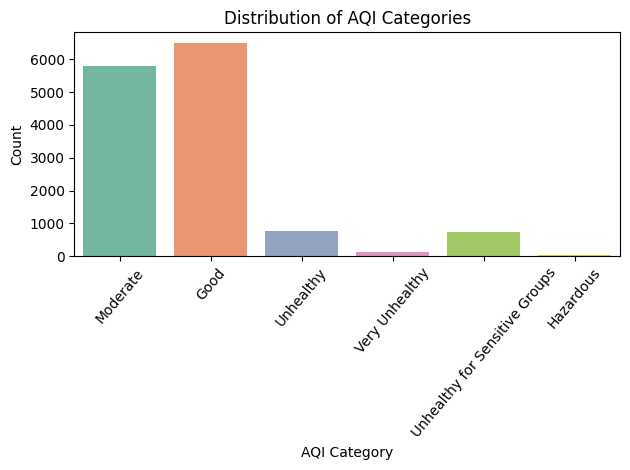

In [106]:
sns.countplot(data=df, x='AQI Category',hue='AQI Category', palette="Set2")#This line creates the countplot. 
plt.title('Distribution of AQI Categories') #Sets the title of the plot.
plt.xlabel('AQI Category')# Sets the label for the x-axis.
plt.ylabel('Count')#Sets the label for the y-axis.
plt.xticks(rotation=50)#Rotates the x-axis labels by 50 degrees to avoid overlap if the labels are long.  
plt.tight_layout()# Adjusts the layout of the plot to prevent overlapping elements. 
plt.show()# Displays the plot.

####  **<font face='sans-serif'>Interpretation:</font>**
###  <font face='sans-serif' size=4>The count plot shows the distribution of AQI values across different categories.the distribution of AQI values where **"Good"** is the most frequent category and **"Hazardous"** is the least</font>

####  **<font face='sans-serif'>Data visualization</font>**

###  **<font face='sans-serif'>Scatter plot</font>**

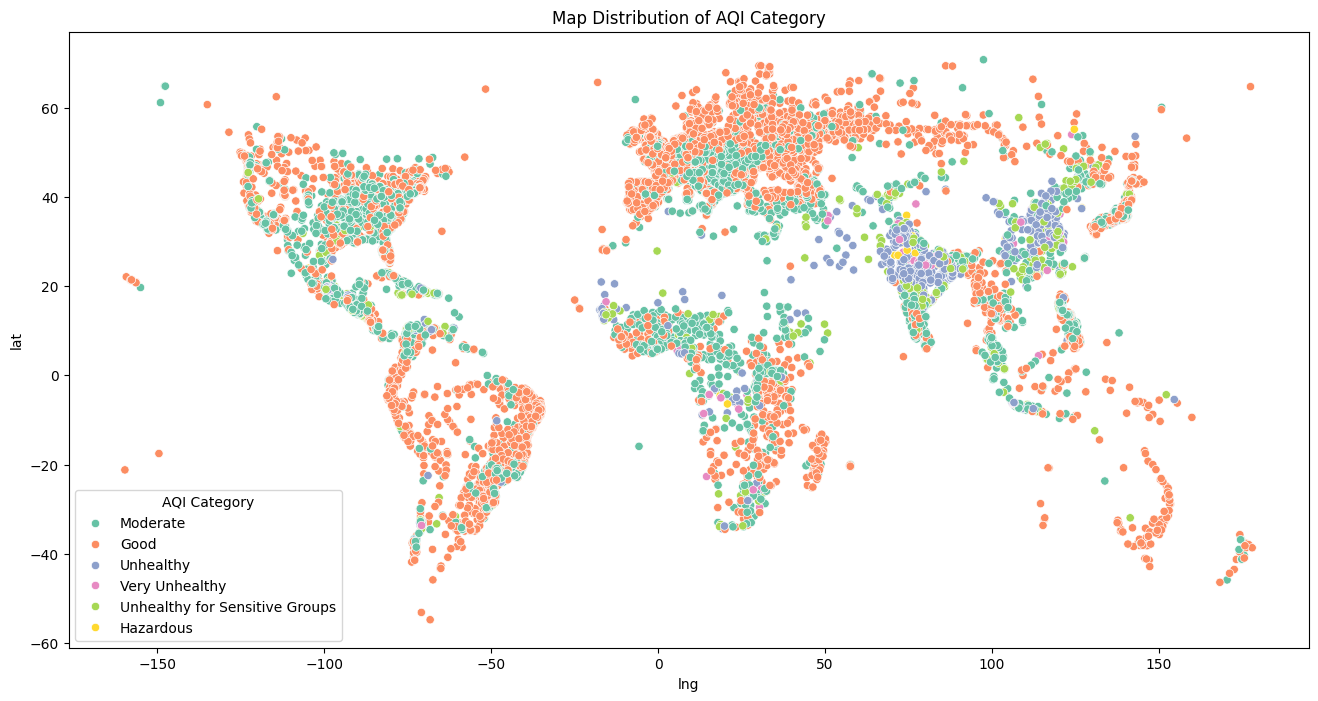

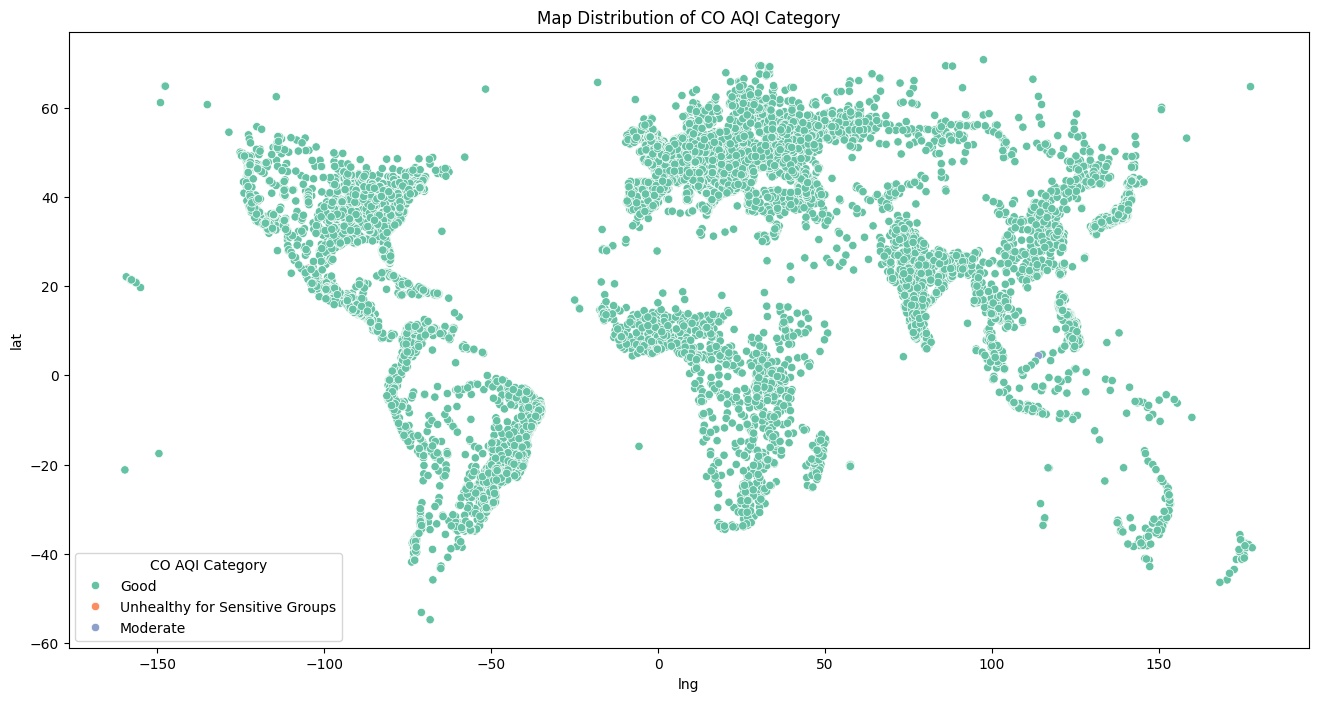

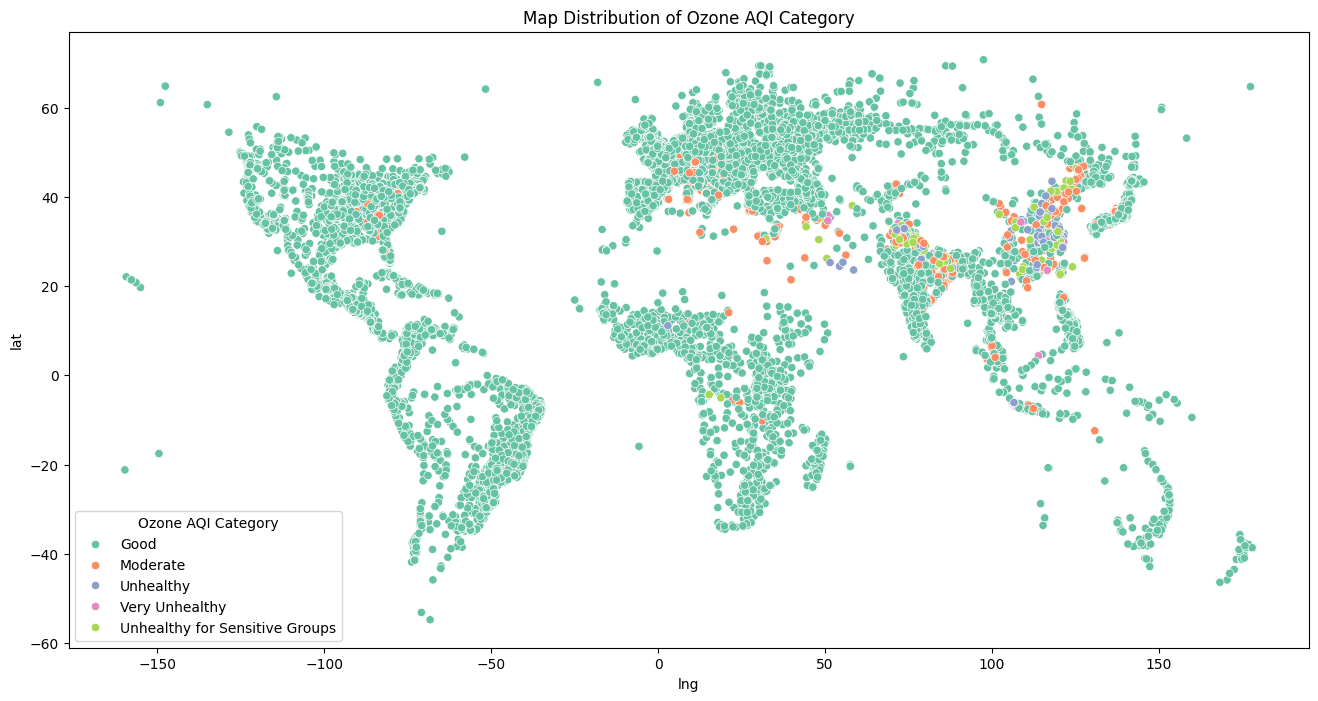

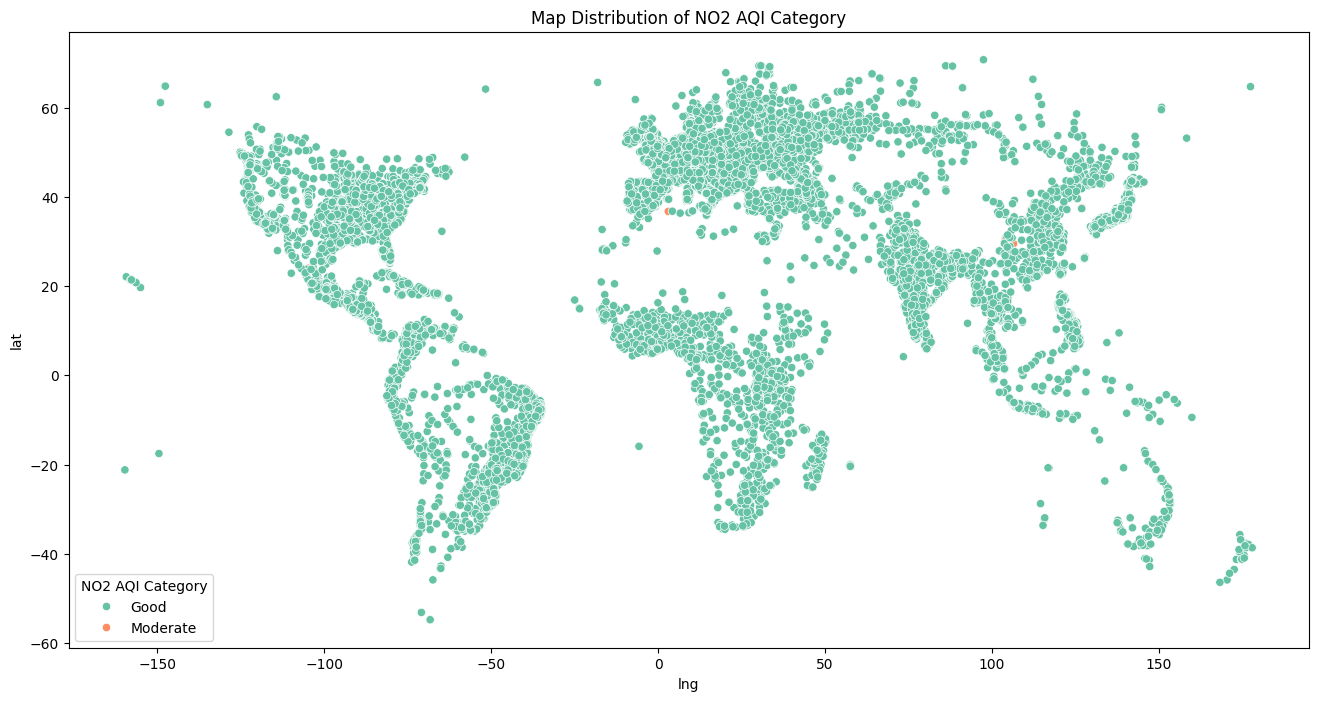

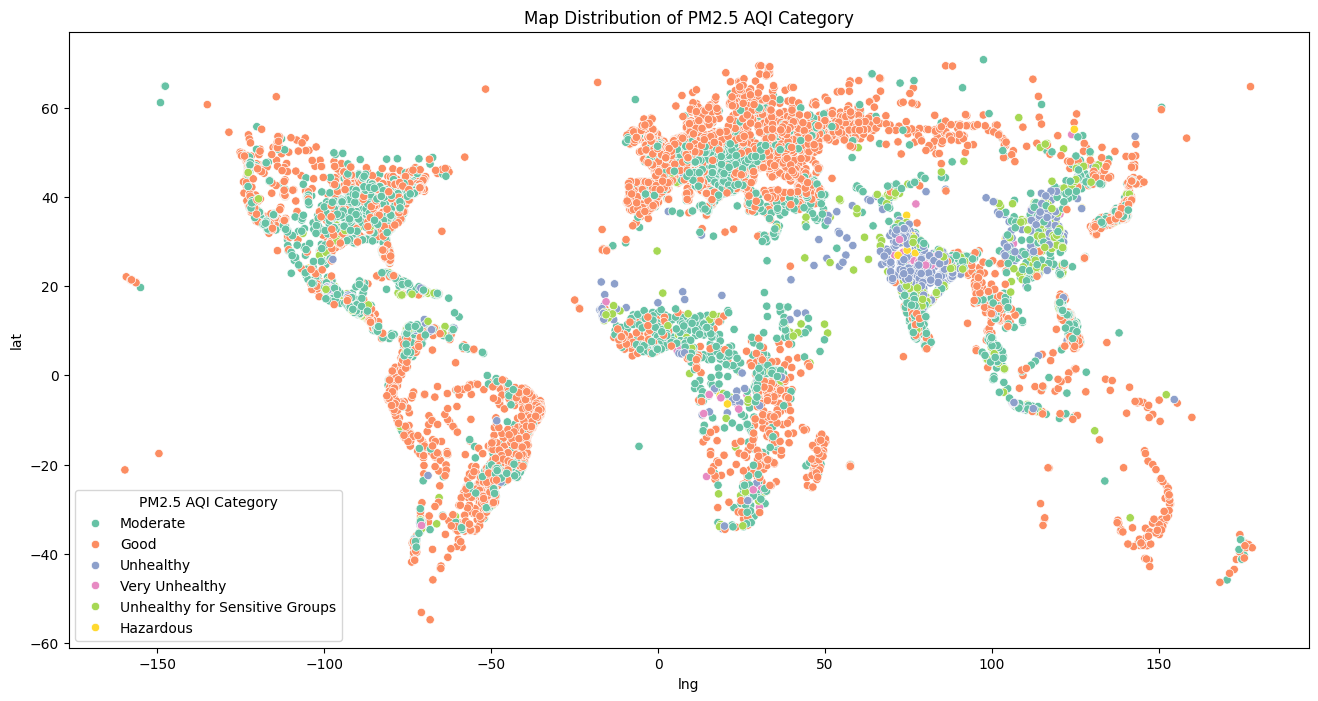

In [107]:
for x in ['AQI Category', 'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category']:
 #This line iterates over the list of AQI categories.
    plt.figure(figsize=(16, 8))
    #This line creates a new figure with a specified size (16 units wide and 8 units tall) for each scatter plot.
    
    sns.scatterplot(data=df,x='lng',y='lat',hue=df[x], palette="Set2")
    #This line creates a scatter plot using seaborn's scatterplot() function.
    
    plt.title(f'Map Distribution of {x}')
    #This line sets the title of the scatter plot

####  **<font face='sans-serif'>Interpretation:</font>**
###  <font face='sans-serif' size=4>This Scatterplot for each AQI category helps in identifying patterns and clusters of air quality across different regions, providing insights into spatial distribution and potential sources of pollution.



</font>

###  **<font face='sans-serif'> Pair plot</font>**

<Figure size 1200x800 with 0 Axes>

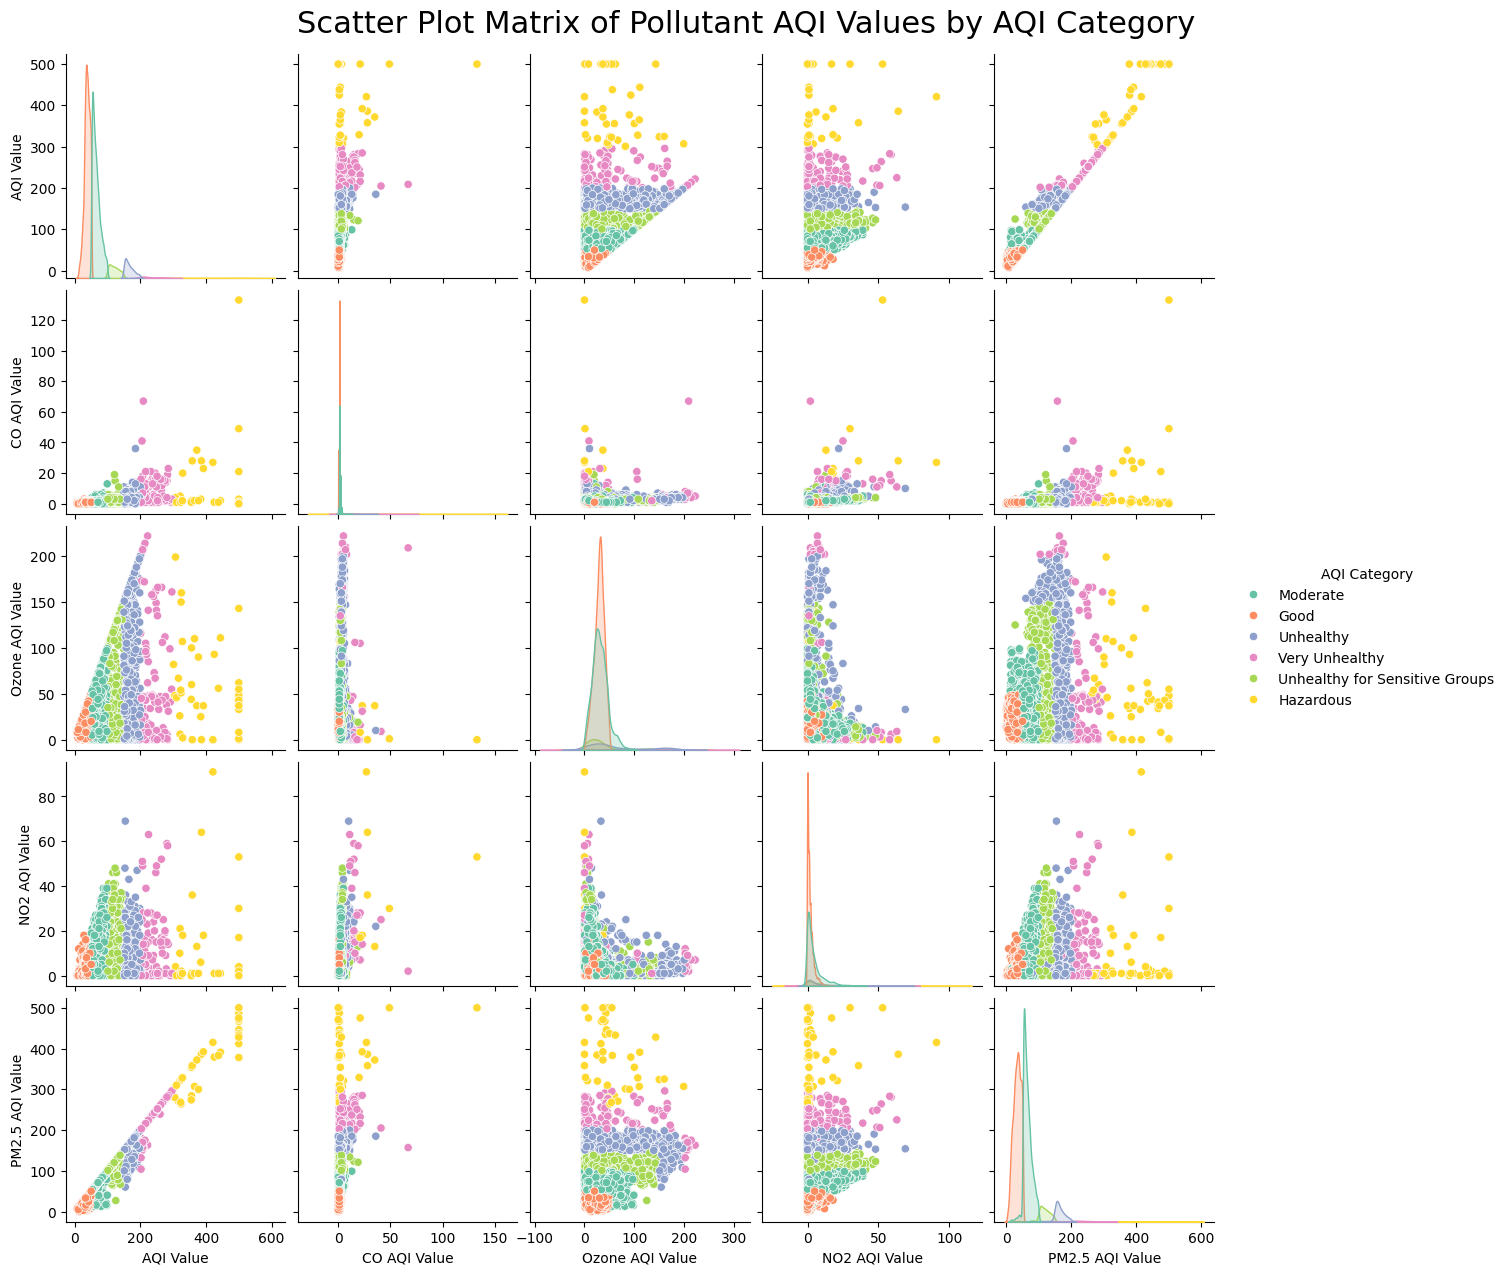

In [108]:
plt.figure(figsize=(12, 8))

# Create a pair plot with scatter plots for each combination of variables with respect to AQI Category
sns.pairplot(data=df, vars=['AQI Value','CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value'],
             hue='AQI Category', palette="Set2", height=2.5)

# Set the title
plt.suptitle('Scatter Plot Matrix of Pollutant AQI Values by AQI Category', y=1.02, fontsize=22)

# Show the plot
plt.show()

####  **<font face='sans-serif'>Interpretation:</font>**
###  <font face='sans-serif' size=4>In this case, it visualizes the relationships between CO AQI Value, Ozone AQI Value, NO2 AQI Value, and PM2.5 AQI Value.Pairplot shows that **PM2.5 AQI** is the most substantial contributor to the AQI value. CO and Ozone AQI values also have prominent influences, followed by NO2 AQI.
</font>

###  **<font face='sans-serif'>Histogram plot</font>**

<Axes: xlabel='AQI Value', ylabel='Count'>

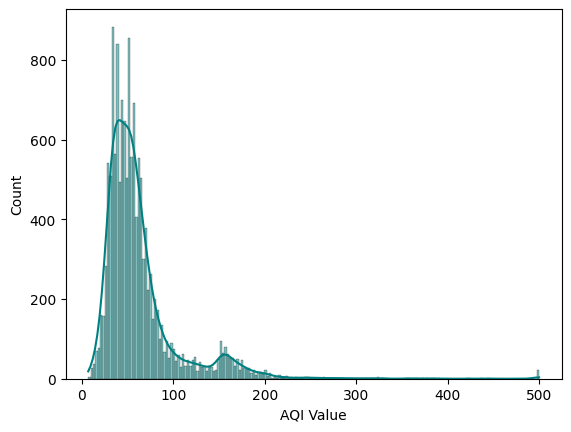

In [109]:
plt.figure()#Creates a new figure for the histogram plot.
sns.histplot(data=df,x="AQI Value",color='teal',kde=True)#Uses seaborn's histplot() function to create a histogram. 

####  **<font face='sans-serif'>Interpretation:</font>**
###  <font face='sans-serif' size=4>By analyzing the postive skewness along with the histogram, we can gain a deeper understanding of the distribution patterns of AQI values. The higher count in the 0-100 **("good","moderate")** range combined with the skewness measure helps to highlight the characteristics and trends of air quality in the dataset.
</font>


###  **<font face='sans-serif'>Pie chart</font>**

In [110]:
#This code seems to be performing a groupby operation on the DataFrame df based on the "Country" column. Then, it's aggregating the sum of each group, sorting the result by the sum of "AQI Value" in descending order, and finally selecting the top 5 rows.
country = df.groupby('Country', as_index=False).agg('sum').sort_values(by=['AQI Value'], ascending=False).head(5)
country

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
166,United States of America,Punta GordaPhoenixPontiacPort NechesPortalesPo...,165391,ModerateModerateModerateGoodModerateModerateGo...,4027,GoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGo...,76936,GoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGo...,23574,GoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGo...,160796,ModerateModerateModerateGoodModerateModerateGo...,104956.6901,-244231.4535
69,India,DarbhangaDharmapuriTekkaliJabalpurUmariaGovind...,101335,Very UnhealthyModerateUnhealthyUnhealthyUnheal...,1228,GoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGo...,38363,UnhealthyGoodModerateGoodModerateGoodGoodGoodG...,1315,GoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGo...,99558,Very UnhealthyModerateUnhealthyUnhealthyUnheal...,15410.9827,57699.4576
75,Italy,Priolo GargalloRamaccaGuardiagreleTeanoTeramoI...,52227,ModerateModerateModerateGoodGoodModerateModera...,945,GoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGo...,37285,GoodGoodGoodGoodGoodModerateGoodGoodGoodModera...,1910,GoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGo...,47315,ModerateModerateModerateGoodGoodModerateModera...,36085.4201,10193.3667
58,Germany,HeddesheimHeiligenhausHaigerHarrisleeHasbergen...,49562,ModerateGoodGoodGoodGoodModerateModerateGoodGo...,833,GoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGo...,36910,GoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGo...,2036,GoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGo...,47281,ModerateGoodGoodGoodGoodModerateModerateGoodGo...,52724.2906,9583.0889
33,China,QinzhouHangzhouTianjinXushanYanchengYanjiFuzho...,48383,ModerateVery UnhealthyUnhealthy for Sensitive ...,1320,GoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGo...,33184,ModerateVery UnhealthyUnhealthy for Sensitive ...,2639,GoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGo...,42819,ModerateUnhealthyUnhealthy for Sensitive Group...,13067.4887,44749.8754


####  <font face='sans-serif'>Interpretation:</font>
####  <font face='sans-serif' size=4>Based on the provided dataset, the five countries with the highest AQI values are the    **United States of America, India, Italy, Germany, and China.** These countries exhibit varying levels of air pollution, with AQI readings ranging from "Moderate" to "Very Unhealthy." The high AQI values suggest elevated levels of pollutants in the air, which can pose health risks to the population.</font>

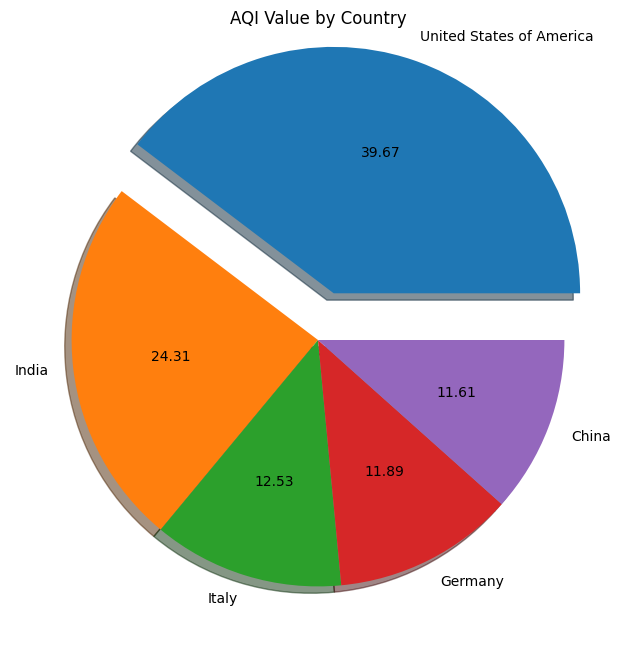

In [111]:
# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(data=country ,x='AQI Value', labels='Country', autopct='%.2f', shadow=True, explode=(0.2, 0, 0, 0, 0), colors=None)
plt.title('AQI Value by Country')
plt.show()

#### **<font face='sans-serif'>Interpretation:</font>**
####  <font face='sans-serif' size=4>This piechart shows  **United States of America** is most polluted is about 39.67% has higher AQI value when compared to **India, Italy, Germany, and China.** All these countries exhibit varying levels of air pollution, with AQI readings ranging from "Moderate" to "Very Unhealthy."</font>

###  **<font face='sans-serif'>Heatmap</font>**

In [112]:
# Compute the correlation matrix
corr_matrix=df[["AQI Value","CO AQI Value","NO2 AQI Value","Ozone AQI Value","PM2.5 AQI Value"]].corr()
corr_matrix

,AQI Value,CO AQI Value,NO2 AQI Value,Ozone AQI Value,PM2.5 AQI Value
AQI Value,1.000000,0.495144,0.308366,0.348281,0.979874
CO AQI Value,0.495144,1.000000,0.433509,0.074985,0.493940
NO2 AQI Value,0.308366,0.433509,1.000000,-0.229369,0.339855
Ozone AQI Value,0.348281,0.074985,-0.229369,1.000000,0.252082
PM2.5 AQI Value,0.979874,0.493940,0.339855,0.252082,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

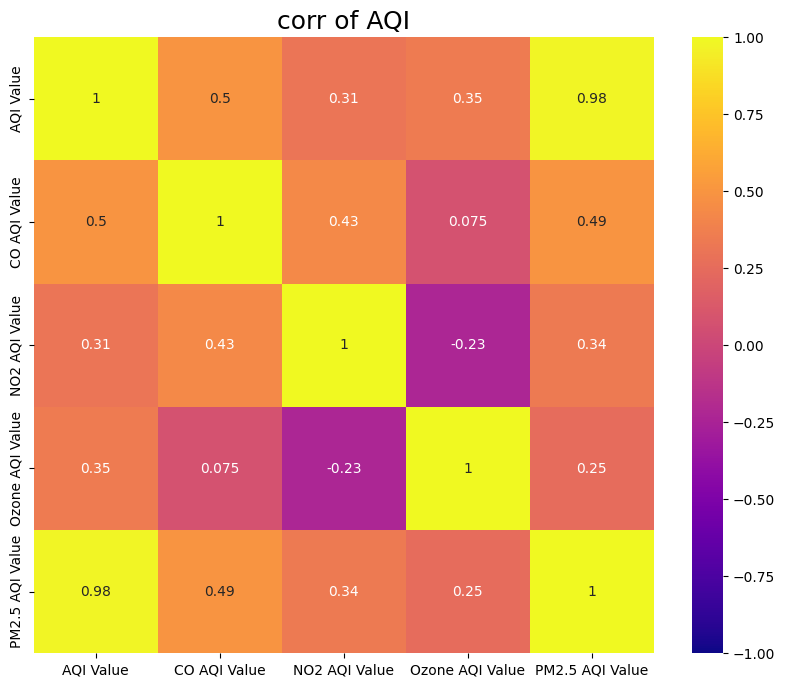

In [113]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='plasma',vmin=-1,vmax=1)
plt.title("corr of AQI",fontsize=18)
plt.show

####  **<font face='sans-serif'>Interpretation:</font>**
####  <font face='sans-serif' size=4>**PM2.5** correlated, around **98%**, it suggests that changes in PM2.5 levels directly impact the Air Quality Index. This strong correlation implies that PM2.5 is a significant contributor to overall air pollution. Similarly, if ozone levels also show a high correlation with PM2.5 or AQI values, it suggests that these pollutants might have common sources or that their concentrations influence each other. This information can be crucial for policymakers and public health officials in understanding the sources and dynamics of air pollution and in devising effective mitigation strategies.</font>

###  **<font face='sans-serif'>Boxplot</font>**

In [114]:
# Select numeric columns
numeric_columns = ['AQI Value','CO AQI Value','Ozone AQI Value','NO2 AQI Value','PM2.5 AQI Value']

# Calculate Z-scores
z_scores = (df[numeric_columns] - df[numeric_columns].mean()) / df[numeric_columns].std()
# Set threshold for identifying outliers
threshold = 3
# Identify outliers
outliers = (z_scores > threshold) | (z_scores < -threshold)

In [115]:
print("Outliers:")
# Count the number of outliers in each column
print(outliers.sum())

Outliers:
AQI Value          207
CO AQI Value       112
Ozone AQI Value    314
NO2 AQI Value      325
PM2.5 AQI Value    190
dtype: int64


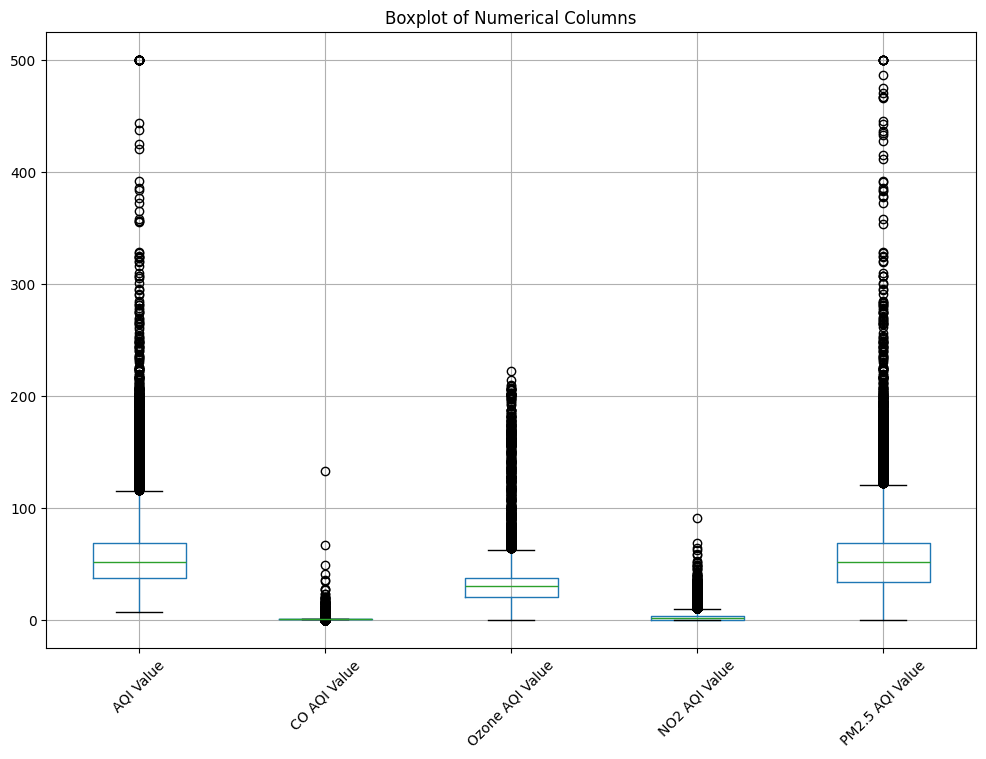

In [116]:
df.boxplot(column=numeric_columns, figsize=(12, 8))
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Columns")
plt.show()

####  **<font face='sans-serif'>Interpretation:</font>**
####  <font face='sans-serif' size=4>**PM2.5** significantly impacts AQI, policymakers can focus on reducing particulate emissions from sources like transportation and industry.AQI Value and PM2.5 AQI Value has almost same boxplot and CO AQI Value and NO2 AQI Value have a small IQR. A small interquartile range (IQR) in a dataset indicates that the middle 50% of the data is tightly clustered around the median, suggesting consistency, limited spread, and potentially less skewness in the distribution. Understanding the implications of a small IQR helps in interpreting the characteristics and variability of the data.</font>

#  **<font face='sans-serif'> Feature Engineering</font>**
###  <i><font face='sans-serif' size=4><span style="color:#008080">Feature engineering is the process of transforming raw data into meaningful features that better represent the underlying problem to predictive models, resulting in improved model performance. It involves creating new features, transforming existing ones, and selecting the most relevant features.

###  **<font face='sans-serif'> Label Encoding</font>**

In [117]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

In [118]:
# Encode the 'AQI Category' column
df.loc[:, 'AQI Category'] = encoder.fit_transform(df['AQI Category'])

In [119]:
# Encode the 'CO AQI Category' column
df.loc[:, 'CO AQI Category'] = encoder.fit_transform(df['CO AQI Category'])

In [120]:
# Encode the 'NO2 AQI Category' column
df.loc[:, 'NO2 AQI Category'] = encoder.fit_transform(df['NO2 AQI Category'])

In [121]:
# Encode the 'Ozone AQI Category' column
df.loc[:, 'Ozone AQI Category'] = encoder.fit_transform(df['Ozone AQI Category'])

In [122]:
# Encode the 'PM2.5 AQI Category' column
df.loc[:, 'PM2.5 AQI Category'] = encoder.fit_transform(df['PM2.5 AQI Category'])

In [123]:
# Encode the 'Country' column
df.loc[:, 'Country'] = encoder.fit_transform(df['Country'])

In [124]:
# Encode the 'City' column
df.loc[:, 'City'] = encoder.fit_transform(df['City'])

In [125]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,130,9931,51,2,1,0,36,0,0,0,51,2,44.7444,44.2031
1,22,9945,41,0,1,0,5,0,1,0,41,0,-5.2900,-44.4900
2,75,9967,66,2,1,0,39,0,2,0,66,2,37.1667,15.1833
3,123,9987,34,0,1,0,34,0,0,0,20,0,53.0167,20.8833
4,166,10039,54,2,1,0,14,0,11,0,54,2,16.1005,-88.8074


###  **<font face='sans-serif'>Define Target</font>**

In [126]:
# Define features (X) and target (y)
X=df.drop(columns=["AQI Value","AQI Category"])
y=df["AQI Value"]


In [127]:
# Display the features
X

,Country,City,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,130,9931,1,0,36,0,0,0,51,2,44.7444,44.2031
1,22,9945,1,0,5,0,1,0,41,0,-5.2900,-44.4900
2,75,9967,1,0,39,0,2,0,66,2,37.1667,15.1833
3,123,9987,1,0,34,0,0,0,20,0,53.0167,20.8833
4,166,10039,1,0,14,0,11,0,54,2,16.1005,-88.8074
...,...,...,...,...,...,...,...,...,...,...,...,...
13951,33,11239,3,0,160,2,1,0,79,2,24.8011,113.5927
13952,166,4930,1,0,34,0,5,0,54,2,37.5516,-77.3285
13953,140,7526,1,0,39,0,1,0,71,2,49.0650,18.9219
13954,54,11022,1,0,20,0,5,0,50,0,48.7786,2.2906


In [128]:
# Display the target
y

0         51
1         41
2         66
3         34
4         54
        ... 
13951    160
13952     54
13953     71
13954     50
13955     71
Name: AQI Value, Length: 13956, dtype: int64

###  **<font face='sans-serif'> Removing outliers</font>**

In [129]:
# Check if the 'AQI Value' column exists
if 'AQI Value' in df.columns:
    # Calculate the interquartile range (IQR)
    Q1 = df['AQI Value'].quantile(0.25)
    Q3 = df['AQI Value'].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df['AQI Value'] < lower_bound) | (df['AQI Value'] > upper_bound)]

    # Remove outliers
    df_cleaned = df[(df['AQI Value'] >= lower_bound) & (df['AQI Value'] <= upper_bound)]

    print(f"Number of outliers: {outliers.shape[0]}")
    print(f"DataFrame size after removing outliers: {df_cleaned.shape}")

    # Calculate skewness after removing outliers
    skewness_cleaned = skew(df_cleaned['AQI Value'].dropna())
    print(f"Skewness of AQI Value after removing outliers: {skewness_cleaned}")

else:
    print("The column 'AQI Value' does not exist in the DataFrame.")

Number of outliers: 1358
DataFrame size after removing outliers: (12598, 14)
Skewness of AQI Value after removing outliers: 0.7317390084868698


###  **<font face='sans-serif'> Applying VarianceThreshold </font>**

In [130]:
# Apply VarianceThreshold
vt = VarianceThreshold()
x = vt.fit_transform(X)


###  **<font face='sans-serif'> Splitting data</font>**

In [131]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  **<font face='sans-serif'>Feature Scaling and Feature Selection</font>**
##  **<font face='sans-serif'>Feature Scaling</font>**
###  <i><font face='sans-serif' size=4><span style="color:#008080">Feature scaling is a preprocessing step in machine learning that involves adjusting the range of independent variables or features. This process ensures that each feature contributes equally to the model's performance, preventing features with larger scales from dominating the learning algorithm. 
##  **<font face='sans-serif'>Feature Selection</font>**
###  <i><font face='sans-serif' size=4><span style="color:#008080">Feature selection is the process of identifying and selecting a subset of relevant features for use in model construction. This step helps in reducing model complexity, improving performance, and preventing overfitting

###  **<font face='sans-serif'>pipeline</font>**
####  **<font face='sans-serif'>1.Standard Scaling</font>**
####  **<font face='sans-serif'>2.SelectKBest</font>**

In [132]:
# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('KBest',SelectKBest(score_func=f_classif, k=5))  # Select top 'k' features based on ANOVA F-test
])   

In [133]:
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('KBest', SelectKBest(k=5))])

In [134]:
# Transform the training and testing data
X_train_selected = pipeline.fit_transform(X_train, y_train)
X_test_selected =pipeline.transform(X_test)

In [135]:
# Accessing the indices of the selected features from the SelectKBest step in pipeline.
selected_indices = pipeline.named_steps['KBest'].get_support(indices=True)
selected_features = X.columns[selected_indices]

In [136]:
# Display the selected features by using SelectKBest
print("selected feature:",selected_features)

selected feature: Index(['CO AQI Value', 'Ozone AQI Category', 'NO2 AQI Category',
       'PM2.5 AQI Value', 'PM2.5 AQI Category'],
      dtype='object')


####  **<font face='sans-serif'>Random Forest Regressor</font>**

In [137]:
#Initializes a Random Forest Regressor model with a fixed random state.
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [138]:
#Accessing the feature importances calculated by the Random Forest model.
feature_importances = rf.feature_importances_

In [139]:
# Accessing the indices of the feature importance
sorted_indices = feature_importances.argsort()[::-1]

In [140]:
# Display the feature importance
print("Feature Importances:")
for idx in sorted_indices:
    print(f"{X.columns[idx]}: {feature_importances[idx]}")


Feature Importances:
PM2.5 AQI Value: 0.9709024999079168
Ozone AQI Value: 0.025104792357642947
PM2.5 AQI Category: 0.001781486923809606
lat: 0.0008369549538419585
Ozone AQI Category: 0.0004262214677508622
CO AQI Value: 0.00032811064034632875
NO2 AQI Value: 0.00025576924460820694
Country: 0.0001970480500762818
lng: 8.041236473264463e-05
City: 8.022870217782292e-05
NO2 AQI Category: 6.443862879018349e-06
CO AQI Category: 3.1524217582808124e-08


In [141]:
#Initializes the SelectFromModel transformer with the RandomForestRegressor model (rf) as the estimator and a threshold set to 'median'. 
sfm = SelectFromModel(rf, threshold='median')
X_selected = sfm.fit_transform(X_train, y_train)

In [142]:
# Display the selected features by using Sfm from Random Forest
selected_features = X.columns[sfm.get_support()]
print("\nSelected Features:")
print(selected_features)


Selected Features:
Index(['CO AQI Value', 'Ozone AQI Value', 'Ozone AQI Category',
       'PM2.5 AQI Value', 'PM2.5 AQI Category', 'lat'],
      dtype='object')


#  **<font face='sans-serif'>Model Building and Model Evaluation</font>**
##  **<font face='sans-serif'>Model Building </font>**
###  <i><font face='sans-serif' size=4><span style="color:#008080">Model building in regression involves selecting an appropriate regression algorithm, training it on labeled training data, and optimizing its parameters to create a predictive model for continuous target variables.
 ##  **<font face='sans-serif'>Model Evaluation</font>**
###  <i><font face='sans-serif' size=4><span style="color:#008080">Model evaluation in regression involves assessing the performance of the trained regression model to understand its predictive capability and generalization to unseen data.
###  **<font face='sans-serif'>Metrics</font>**
###  <i><font face='sans-serif' size=4><span style="color:#008080">Common evaluation metrics for regression tasks include Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) score, which quantitatively measure the difference between predicted and actual values.

####  **<font face='sans-serif'>1. MLP Regressor</font>**

In [143]:
#Initialize an MLPRegressor model.
model = MLPRegressor()
#Fit the model to the training data
model.fit(X_train, y_train)

#Use the trained model to make predictions 
y_pred = model.predict(X_test)

# Evaluate the model 
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [144]:
# Print results
print("Mean_absolute_error:",mae)
print("Mean_squared_error:",mse)
print("Rootmean_squared_error:",rmse)
print("R2_score:",r2 )


Mean_absolute_error: 2.669964558799895
Mean_squared_error: 13.28576609029199
Rootmean_squared_error: 3.6449644840919904
R2_score: 0.9926086091692876


#### **<font face='sans-serif'>Result:**</font>
### <font face='sans-serif' size=4>**Mean Absolute Error (MAE):** 2.669
### <font face='sans-serif' size=4>**Interpretation:** On average, the predictions are off by 2.669 units from the actual values.
### <font face='sans-serif' size=4>**Mean Squared Error (MSE):** 13.285
### <font face='sans-serif' size=4>**Interpretation:** The average squared difference between the predicted and actual values is 13.285, indicating the magnitude of errors.
### <font face='sans-serif' size=4>**Root Mean Squared Error (RMSE):** 3.644
### <font face='sans-serif' size=4>**Interpretation:** On average, the predictions deviate from the actual values by 3.644 units, indicating the spread of residuals.
### <font face='sans-serif' size=4>**R-squared (R²) Score:** 0.9926
### <font face='sans-serif' size=4>**Interpretation:** The model explains **99.26%** of the variance in the dependent variable, indicating a very high level of predictive accuracy.</font>


####  **<font face='sans-serif'>2. Random Forest Regressor</font>**

In [145]:
#Initialize an  Random Forest Regressor model.
regressor = RandomForestRegressor(n_estimators=100, max_depth=5)
#Fit the model to the training data
regressor.fit(X_train, y_train)

#Use the trained model to make predictions
y_pred= regressor.predict(X_test)
r2= r2_score(y_test, y_pred)

# Evaluate the model 
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


In [146]:
# Print results
print("Mean_absolute_error:",mae)
print("Mean_squared_error:",mse)
print("Rootmean_squared_error:",rmse)
print("R2_score:",r2 )


Mean_absolute_error: 2.4218119690420923
Mean_squared_error: 20.531740003762614
Rootmean_squared_error: 4.531196310441936
R2_score: 0.9885773907374997


### **<font face='sans-serif'>Result:**</font>
### <font face='sans-serif' size=4>**Mean Absolute Error (MAE):** 2.4239756807910373
### <font face='sans-serif' size=4>**Interpretation:** On average, the predictions are off by 2.42 units from the actual values.
### <font face='sans-serif' size=4>**Mean Squared Error (MSE):** 20.723
### <font face='sans-serif' size=4>**Interpretation:** The average squared difference between the predicted and actual values is 20.723, indicating the magnitude of errors.
### <font face='sans-serif' size=4>**Root Mean Squared Error (RMSE):** 4.552242121866171
### <font face='sans-serif' size=4>**Interpretation:** On average, the predictions deviate from the actual values by 4.55 units, indicating the spread of residuals.
### <font face='sans-serif' size=4>**R-squared (R²) Score:** 0.9884
### <font face='sans-serif' size=4.5>**Interpretation:** The model explains **98.84%** of the variance in the dependent variable, indicating a very high level of predictive accuracy.</font>

####  **<font face='sans-serif'>3. Linear Regression</font>**

In [147]:
#Initialize an Linear Regression model.
model = LinearRegression()
#Fit the model to the training data
model.fit(X_train, y_train)

#Use the trained model to make predictions
y_pred= model.predict(X_test)

# Evaluate the model 
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2= r2_score(y_test, y_pred)

In [148]:
# Print results
print("Mean_absolute_error:",mae)
print("Mean_squared_error:",mse)
print("Rootmean_squared_error:",rmse)
print("R2_score:",r2 )

Mean_absolute_error: 4.416515892967339
Mean_squared_error: 50.91105254862882
Rootmean_squared_error: 7.13519814361373
R2_score: 0.9716761920665743


#### **<font face='sans-serif'>Result:**</font>
### <font face='sans-serif' size=4>**Mean Absolute Error (MAE):**  4.416
### <font face='sans-serif' size=4>**Interpretation:** On average, the predictions are off by 4.416 units from the actual values.
### <font face='sans-serif' size=4>**Mean Squared Error (MSE):** 50.911
### <font face='sans-serif' size=4>**Interpretation:** The average squared difference between the predicted and actual values is 50.911, indicating the magnitude of errors.
### <font face='sans-serif' size=4>**Root Mean Squared Error (RMSE):** 7.1351
### <font face='sans-serif' size=4>**Interpretation:** On average, the predictions deviate from the actual values by 7.135 units, indicating the spread of residuals.
### <font face='sans-serif' size=4>**R-squared (R²) Score:** 0.9716
### <font face='sans-serif' size=4>**Interpretation:** The model explains 97.16% of the variance in the dependent variable, indicating a  high level of predictive accuracy.</font>

####  **<font face='sans-serif'>4. Gradient Boosting Regressor</font>**

In [149]:
#Initialize an Gradient Boosting Regressor model.
model = GradientBoostingRegressor()
#Fit the model to the training data
model.fit(X_train, y_train)

#Use the trained model to make predictions          
y_pred= model.predict(X_test)

# Evaluate the model          
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [150]:
# Print results
print("Mean_absolute_error:",mae)
print("Mean_squared_error:",mse)
print("Rootmean_squared_error:",rmse)
print("R2_score:",r2)

Mean_absolute_error: 0.9751840294856556
Mean_squared_error: 7.7532909454846015
Rootmean_squared_error: 2.7844731899381974
R2_score: 0.9956865412793791


#### **<font face='sans-serif'>Result:**</font>
### <font face='sans-serif' size=4>**Mean Absolute Error (MAE):** 0.975
### <font face='sans-serif' size=4>**Interpretation:** On average, the predictions are off by 0.975 units from the actual values.
### <font face='sans-serif' size=4>**Mean Squared Error (MSE):** 7.753
### <font face='sans-serif' size=4>**Interpretation:** The average squared difference between the predicted and actual values is 7.753, indicating the magnitude of errors.
### <font face='sans-serif' size=4>**Root Mean Squared Error (RMSE):** 2.784
### <font face='sans-serif' size=4>**Interpretation:** On average, the predictions deviate from the actual values by 2.784 units, indicating the spread of residuals.
### <font face='sans-serif' size=4>**R-squared (R²) Score:** 0.9956
### <font face='sans-serif' size=4>**Interpretation:** The model explains **99.56%** of the variance in the dependent variable, indicating a very high level of predictive accuracy.</font>


####  **<font face='sans-serif'>5. AdaBoost Regressor</font>**

In [151]:
#Initialize an AdaBoost Regressor model.
model = AdaBoostRegressor()
#Fit the model to the training data
model.fit(X_train, y_train)

#Use the trained model to make predictions
y_pred = model.predict(X_test)

# Evaluate the model 
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [152]:
# Print results
print("Mean_absolute_error:",mae)
print("Mean_squared_error:",mse)
print("Rootmean_squared_error:",rmse)
print("R2_score:",r2 )

Mean_absolute_error: 7.527446847386903
Mean_squared_error: 96.10774693751496
Rootmean_squared_error: 9.803455867066214
R2_score: 0.9465315048717104


#### **<font face='sans-serif'>Result:**</font>
### <font face='sans-serif' size=4>**Mean Absolute Error (MAE):**  8.583
### <font face='sans-serif' size=4>**Interpretation:** On average, the predictions are off by 8.583 units from the actual values.
### <font face='sans-serif' size=4>**Mean Squared Error (MSE):** 116.03
### <font face='sans-serif' size=4>**Interpretation:** The average squared difference between the predicted and actual values is 116.03, indicating the magnitude of errors.
### <font face='sans-serif' size=4>**Root Mean Squared Error (RMSE):** 10.771
### <font face='sans-serif' size=4>**Interpretation:** On average, the predictions deviate from the actual values by 10.771 units, indicating the spread of residuals.
### <font face='sans-serif' size=4>**R-squared (R²) Score:** 0.93544
### <font face='sans-serif' size=4>**Interpretation:** The model explains **93.54%** of the variance in the dependent variable, indicating a very high level of predictive accuracy.</font>

#  **<font face='sans-serif'> Hyperparameter Tuning</font>**
###  <i><font face='sans-serif' size=3><span style="color:#008080">Hyperparameter tuning is the optimization of settings that control a machine learning model's learning process, aiming to enhance its performance.

In [153]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grids
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,)],
    'alpha': [0.0001, 0.001]
}

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

param_grid_lr = {}  # No hyperparameters to tune for Linear Regression

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

param_grid_ab = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1]
}

# Define models
models = {
    'MLPRegressor': (MLPRegressor(), param_grid_mlp),
    'RandomForestRegressor': (RandomForestRegressor(), param_grid_rf),
    'LinearRegression': (LinearRegression(), param_grid_lr),
    'GradientBoostingRegressor': (GradientBoostingRegressor(), param_grid_gb),
    'AdaBoostRegressor': (AdaBoostRegressor(), param_grid_ab)
}

# Dictionary to store the best model for each algorithm
best_models = {}

# Perform grid search for each model
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Store the best model
    best_models[model_name] = grid_search.best_estimator_
    
   # Print best parameters
    print(f"Best parameters for {model_name}:")
    print(grid_search.best_params_)
 
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Metrics for {model_name}:")
    print(f"  - Mean Squared Error: {mse}")
    print(f"  - Root Mean Squared Error: {rmse}")
    print(f"  - Mean Absolute Error: {mae}")
    print(f"  - R-squared: {r2}")
# Print the best model for each algorithm
for model_name, best_model in best_models.items():
    print(f"Best parameter for {model_name}: {best_model}")



Best parameters for MLPRegressor:
{'alpha': 0.0001, 'hidden_layer_sizes': (100,)}
Metrics for MLPRegressor:
  - Mean Squared Error: 5.738908671993978
  - Root Mean Squared Error: 2.3956019435611537
  - Mean Absolute Error: 0.8659627475884857
  - R-squared: 0.9968072208521368
Best parameters for RandomForestRegressor:
{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Metrics for RandomForestRegressor:
  - Mean Squared Error: 7.111515152329071
  - Root Mean Squared Error: 2.6667424233189583
  - Mean Absolute Error: 0.2243007694432465
  - R-squared: 0.9960435862311465
Best parameters for LinearRegression:
{}
Metrics for LinearRegression:
  - Mean Squared Error: 50.91105254862882
  - Root Mean Squared Error: 7.13519814361373
  - Mean Absolute Error: 4.416515892967339
  - R-squared: 0.9716761920665743
Best parameters for GradientBoostingRegressor:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Metrics for GradientBoostingRegressor:
  - Mean Squared Error: 6.3300887

In [154]:
# Find the best model name based on the lowest mean squared error
best_model_name = min(best_models, key=lambda k: mean_squared_error(y_test, best_models[k].predict(X_test)))
print(f"The best model among the selected algorithms is: {best_model_name}")

The best model among the selected algorithms is: MLPRegressor


#### <font face='sans-serif'>Interpretation:</font>
### <font face='sans-serif' size=4>In summary, both models **(MLPRegressor and GradientBoostingRegressor)** showcase strong predictive performance and are suitable choices for this scenario. Depending on specific requirements such as computational complexity, interpretability, or scalability, one might prefer MLPRegressor due to its neural network architecture or GradientBoostingRegressor for its ensemble learning approach.</font>


####  **<font face='sans-serif'>Feature Importance Analysis</font>**

In [155]:
models['GradientBoostingRegressor'] = GradientBoostingRegressor()
models['GradientBoostingRegressor'].fit(X_train, y_train)

GradientBoostingRegressor()

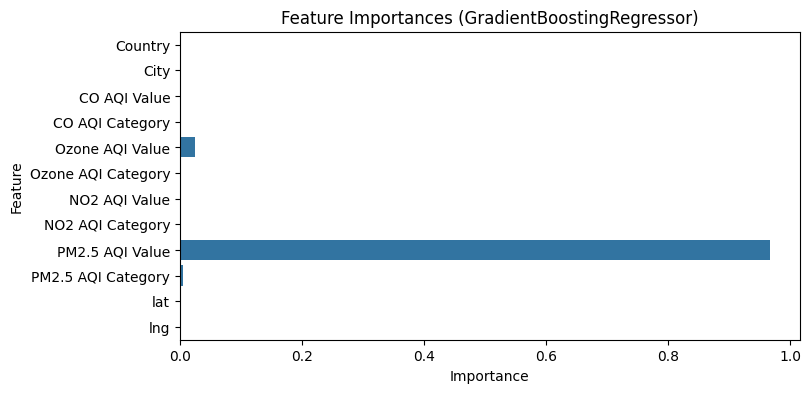

In [156]:
importances = models['GradientBoostingRegressor'].feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Plotting feature importances
plt.figure(figsize=(8, 4))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importances (GradientBoostingRegressor)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
     

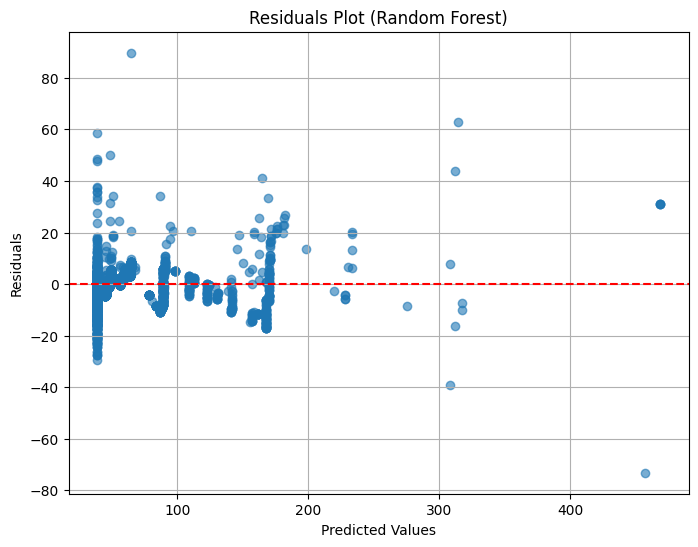

In [157]:
plt.figure(figsize=(8, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0 for reference
plt.title('Residuals Plot (Random Forest)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

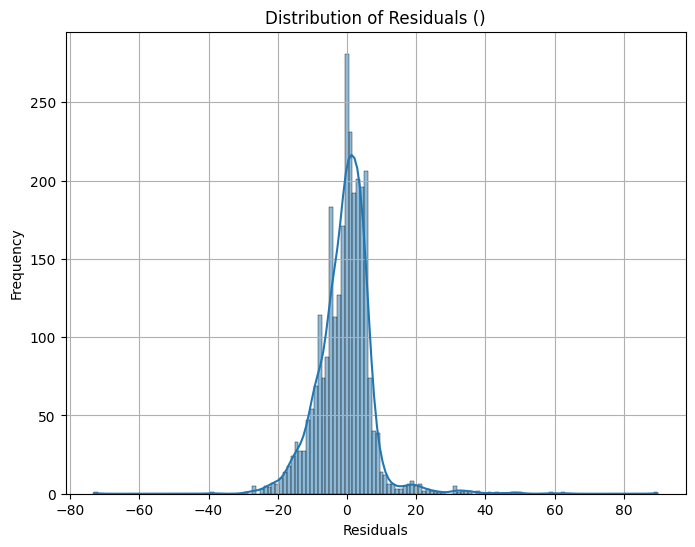

In [158]:

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals ()')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
     


In [159]:
residuals_skewness = skew(residuals)

print("Skewness of residuals:", residuals_skewness)

Skewness of residuals: 0.993905030440299


####  **<font face='sans-serif'>actual vs predicted values</font>**

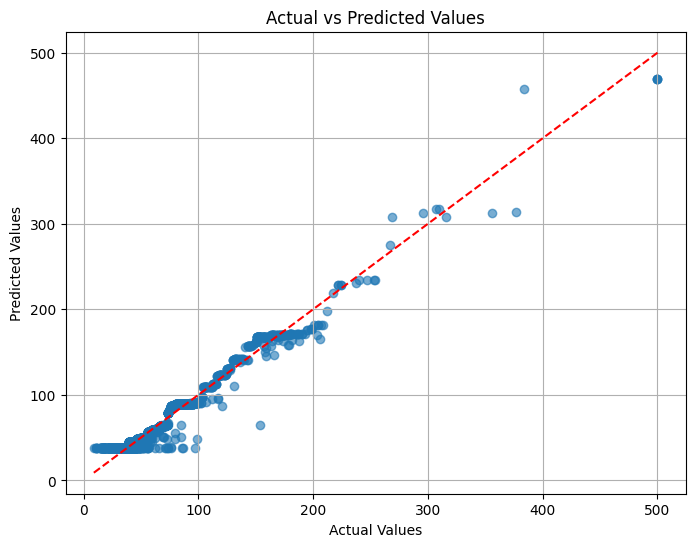

In [160]:
# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Diagonal line for reference
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

#  **<font face='sans-serif'>Save The Model</font>**

In [161]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
import joblib

# Example data preparation
data = pd.read_csv("C:\\Users\\MyLap\\Downloads\\archive (3)\\AQI and Lat Long of Countries.csv")
X = data.drop(columns=["AQI Value"])
y = data["AQI Value"]

# Define the categorical and numerical columns
categorical_columns = ['AQI Category', 'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category', 'Country', 'City']
numerical_columns = [col for col in X.columns if col not in categorical_columns]

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Split the data (assuming train_test_split is imported)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the pipeline
pipeline.fit(X_train, y_train)

# Save the entire pipeline
joblib.dump(pipeline, "pipeline.joblib")

['pipeline.joblib']

##  **<font face='sans-serif'>Test with Unseen Data</font>**

In [162]:
import pandas as pd
import joblib

# Load the pipeline
pipeline = joblib.load("pipeline.joblib")

# Load the unseen data from CSV
unseen_data = pd.read_csv("C:\\Users\\MyLap\\Downloads\\archive (3)\\AQI and Lat Long of Countries.csv")

# Drop the target column if present
unseen_features = unseen_data.drop(columns=["AQI Value"])
actual_values = unseen_data["AQI Value"]

# Apply the pipeline to the unseen data
predictions = pipeline.predict(unseen_features)

# Use or print the predictions
print("Predictions:", predictions)



Predictions: [51. 41. 41. ... 71. 50. 71.]


#  **<font face='sans-serif'>Conclusion</font>**

####  **<font face='sans-serif'>1.Top Polluted Countries:</font>**
###  <i><font face='sans-serif' size=4><span style="color:#008080">Data analysis reveals that South Korean cities' AQI values fall within the higher range observed globally. However,USA, India and China stand out as they have the most cities with exceptionally high AQI values. Furthermore, several cities in the Middle East known for dust storms are also present on this list.
####  **<font face='sans-serif'>2.Overall Air Quality: </font>**
###  <i><font face='sans-serif' size=4><span style="color:#008080">The majority of the recorded AQI values fall within the "Good" to "Moderate" categories, indicating relatively acceptable air quality in many locations. However, there are also instances of higher AQI values, indicating poorer air quality.
####  **<font face='sans-serif'>3.Pollutant Contribution:</font>**
###  <i><font face='sans-serif' size=4><span style="color:#008080">Data analysis reveals that PM2.5 exhibits the strongest correlation with AQI values (r = 0.98), suggesting it is the most significant factor influencing overall air quality. PM2.5 primarily comprises particles from vehicle emissions, industrial activities, and dust. This potentially links regions with extensive industrial activity, like India and China, and those frequently experiencing dust storms, such as some Middle Eastern countries, to elevated AQI levels and Count of countries with hazardous AQI values is 48. 
#### **<font face='sans-serif'>4.geographic distribution of air quality :</font>**
###  <i><font face='sans-serif' size=4><span style="color:#008080">The top ten highest AQI cities in dataset present with a higher proportion of high-density residential areas, including Jodhpur, Boksburg, and Delhi.Data reveals that several cities with low AQI values, including Tari, Huaraz, Manokwari, Huancavelica, Nueva Loja, and Huamachuco, are located in Peru, Bolivia, and Argentina, which boast significant agricultural production of crops like coffee, cocoa, sugarcane, and fruit. This raises the question of whether there could be a potential association between agricultural land-use and low AQI levels in these regions. However, it is important to acknowledge that other factors like high altitude, low population density, and limited industrial activity could also play a role. Further research is needed to establish a definitive link between agricultural practices and air quality in these areas.
####  **<font face='sans-serif'>5.Best features:</font>**
###  <i><font face='sans-serif' size=4><span style="color:#008080">best features for predicting AQI is pm2.5 and ozone.
####  **<font face='sans-serif'>6.Best Regression model to predict:</font>**
###  <i><font face='sans-serif' size=4><span style="color:#008080">In summary, both models (MLPRegressor and GradientBoostingRegressor) showcase strong predictive performance and are suitable choices for this scenario. Depending on specific requirements such as computational complexity, interpretability, or scalability, one might prefer MLPRegressor due to its neural network architecture or GradientBoostingRegressor for its ensemble learning approach.

#  **<font face='sans-serif'>Future Work</font>**
####  **<font face='sans-serif'>Explore Deep Learning Algorithms: </font>**
###  <i><font face='sans-serif' size=4><span style="color:#008080">Investigate the use of advanced deep learning algorithms, such as Convolutional Neural Networks (CNNs) for spatial data, Recurrent Neural Networks (RNNs) or Long Short-Term Memory networks (LSTMs) for time-series data, and Transformers for capturing complex patterns and relationships in the data. These models might offer higher accuracy and better generalization for AQI predictions.
####  **<font face='sans-serif'>Update the Model Periodically: </font>**
###  <i><font face='sans-serif' size=4><span style="color:#008080">Implement a strategy to regularly update the model with new data to ensure it remains accurate and relevant.
####  **<font face='sans-serif'>Address Imbalanced Data:</font>**
###  <i><font face='sans-serif' size=4><span style="color:#008080">Use resampling techniques such as SMOTE (Synthetic Minority Over-sampling Technique) or undersampling to address any imbalances in the dataset, improving model performance on minority classes.
####  **<font face='sans-serif'>Enhance Predictive Power: </font>**
###  <i><font face='sans-serif' size=4><span style="color:#008080">Consider adding more features, such as meteorological data, traffic density, and industrial activity, to improve the model's predictive power and accuracy.